The following dataset describes the monthly Shampoo sales over a period of 3 years.

In [4]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
url1 ="https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv" 
series = read_csv(url1, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


/Users/sarael-metwally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [5]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

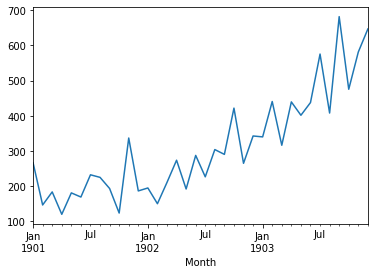

In [6]:
series.plot()
pyplot.show()

From the above figure, we can see that the data set displays an increasing trend and some seasonal componenet. 

We will use a persistence algorithm that is able to predict the trend at the time t+1 based on the previous observation at time t-1.

1. First, we will organize our dataset in a tabular format in order to transform it into a supervised learning problem.

In [9]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


From supervised learning perspectives, the column t-1, represents the input varaible X and the column t+1 reprsents the output variable Y.

2. Second, we will split our data into train/test and we will remove the first observation with NaN value. (i.e. Training data size will be 70%, and Testing data will be 30%.)

In [12]:
X = dataframe.values
train_size = int(len(X) * 0.7)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

3. our persistence model as a function that returns the same input varaible X, this will be the predicted value from the model while the actual value will be under the column t+1. 

In [26]:
def model_persistence(x):
	return x

4. We will evaluate this model on the testing data set using the walk-forward validation method. For every data point in the testing data, we will compute the predictions using our persistence model and we will compare it to the true values using MSE, Mean Squared Error.

In [27]:
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 20403.376


5. We will plot the results to display the divergence among predicted and actual trends of the Shampoo data set. 

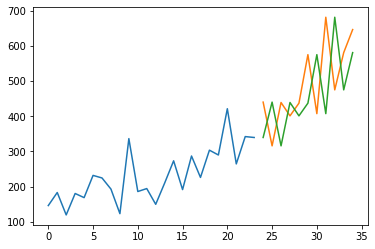

In [28]:
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

6. From the above figure, we can conclude that our predictions is one step behind the actual values and there is a still increasing trends and noise data that indicates the limitation of the used baseline model.  


References:
    https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/